In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE
import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score


from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

In [24]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [25]:
df.rename(columns={'id':'ID', 'gender': 'Gênero', 'age': 'Idade', 'hypertension':'Hipertensão', 'heart_disease':'Doença cardíaca',
                   'ever_married':'Já casou','work_type':'Tipo de trabalho','Residence_type':'Tipo de residência',
                   'avg_glucose_level':'Nível médio de glicose','bmi':'IMC','smoking_status':'Tabagismo','stroke':'Derrame'}, inplace=True)

In [26]:
df.head()

,ID,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo,Derrame
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df["Gênero"] = df["Gênero"].str.replace("Male","Masculino")
df["Gênero"] = df["Gênero"].str.replace("Female","Feminino")
df["Gênero"] = df["Gênero"].str.replace("Other","Outro")

In [28]:
df["Já casou"] = df["Já casou"].str.replace("Yes","Sim")
df["Já casou"] = df["Já casou"].str.replace("No","Não")

In [29]:
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("children","Criança")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Govt_job","Serv_publi")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Never_worked","Nunca_trab")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Private","Privado")
df["Tipo de trabalho"] = df["Tipo de trabalho"].str.replace("Self-employed","Autônomo")

In [30]:
df["Tipo de residência"] = df["Tipo de residência"].str.replace("Urban","Urbana")

In [31]:
df["Tabagismo"] = df["Tabagismo"].str.replace("formerly smoked","Já fumou")
df["Tabagismo"] = df["Tabagismo"].str.replace("never smoked","Nunca fumou")
df["Tabagismo"] = df["Tabagismo"].str.replace("smokes","Fuma")
df["Tabagismo"] = df["Tabagismo"].str.replace("Unknown","Desconhecido")

In [32]:
df.head(6)

,ID,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo,Derrame
0,9046,Masculino,67.0,0,1,Sim,Privado,Urbana,228.69,36.6,Já fumou,1
1,51676,Feminino,61.0,0,0,Sim,Autônomo,Rural,202.21,NaN,Nunca fumou,1
2,31112,Masculino,80.0,0,1,Sim,Privado,Rural,105.92,32.5,Nunca fumou,1
3,60182,Feminino,49.0,0,0,Sim,Privado,Urbana,171.23,34.4,Fuma,1
4,1665,Feminino,79.0,1,0,Sim,Autônomo,Rural,174.12,24.0,Nunca fumou,1
5,56669,Masculino,81.0,0,0,Sim,Privado,Urbana,186.21,29.0,Já fumou,1


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

DT_IMC_pipe = Pipeline( steps=[ 
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X1 = df[['Idade','Gênero','IMC','Nível médio de glicose']].copy()
X1['Gênero'] = X1['Gênero'].replace({'Masculino':0,'Feminino':1,'Outro':-1}).astype(np.uint8)

Missing = X1[X1['IMC'].isna()]
X1 = X1[~X1['IMC'].isna()]
Y1 = X1.pop('IMC')
DT_IMC_pipe.fit(X1,Y1)
#Usando vairáveis relacionadas com IMC para prevelo, 'Idade','Gênero','Nível médio de glicose'
predicted_IMC = pd.Series(DT_IMC_pipe.predict(Missing[['Idade','Gênero','Nível médio de glicose']]),index=Missing.index)
df.loc[Missing.index,'IMC'] = predicted_IMC

### Criando X, que terá as variáveis que utilizaremos, e y, que terá a variável preditora

In [34]:
X = df.drop(['ID','Derrame'],axis=1)
y = df['Derrame']

In [35]:
X.head()

,Gênero,Idade,Hipertensão,Doença cardíaca,Já casou,Tipo de trabalho,Tipo de residência,Nível médio de glicose,IMC,Tabagismo
0,Masculino,67.0,0,1,Sim,Privado,Urbana,228.69,36.6,Já fumou
1,Feminino,61.0,0,0,Sim,Autônomo,Rural,202.21,45.0,Nunca fumou
2,Masculino,80.0,0,1,Sim,Privado,Rural,105.92,32.5,Nunca fumou
3,Feminino,49.0,0,0,Sim,Privado,Urbana,171.23,34.4,Fuma
4,Feminino,79.0,1,0,Sim,Autônomo,Rural,174.12,24.0,Nunca fumou


### Usando o one hot enconding

In [36]:
X['Já casou'] = X['Já casou'].replace({'Não':0,'Sim':1}).astype(np.uint8)
X = pd.get_dummies(X, columns = ['Tipo de trabalho','Tabagismo','Gênero','Tipo de residência'])

In [37]:
X.head()

,Idade,Hipertensão,Doença cardíaca,Já casou,Nível médio de glicose,IMC,Tipo de trabalho_Autônomo,Tipo de trabalho_Criança,Tipo de trabalho_Nunca_trab,Tipo de trabalho_Privado,Tipo de trabalho_Serv_publi,Tabagismo_Desconhecido,Tabagismo_Fuma,Tabagismo_Já fumou,Tabagismo_Nunca fumou,Gênero_Feminino,Gênero_Masculino,Gênero_Outro,Tipo de residência_Rural,Tipo de residência_Urbana
0,67.0,0,1,1,228.69,36.6,0,0,0,1,0,0,0,1,0,0,1,0,0,1
1,61.0,0,0,1,202.21,45.0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
2,80.0,0,1,1,105.92,32.5,0,0,0,1,0,0,0,0,1,0,1,0,1,0
3,49.0,0,0,1,171.23,34.4,0,0,0,1,0,0,1,0,0,1,0,0,0,1
4,79.0,1,0,1,174.12,24.0,1,0,0,0,0,0,0,0,1,1,0,0,1,0


## Comparação entre os modelos

#### Treinando os modelos

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

X_train_rf, y_train_rf = rus.fit_resample(X_train, y_train)

rf_pipeline = Pipeline(steps = [('scale',StandardScaler()),
                                ('RF',RandomForestClassifier(n_estimators= 950,min_samples_split= 5,
                                                             min_samples_leaf= 1,max_features= 'sqrt',
                                                             max_depth= 30,bootstrap= True,random_state=42))])

rf_pipeline.fit(X_train_rf,y_train_rf)

downsampled_pred_rf = rf_pipeline.predict(X_test)

In [40]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

logreg_pipeline = Pipeline(steps = [('scale',StandardScaler()),('LR',LogisticRegression(C=0.004772,penalty='l1',
                                                                                        solver= 'liblinear',random_state=42))])

X_train_rl, y_train_rl = ros.fit_resample(X_train, y_train)

logreg_pipeline.fit(X_train_rl,y_train_rl)

logreg_tuned_pred = logreg_pipeline.predict(X_test)

#### Obtendo as medidas

In [41]:
rf_df = pd.DataFrame(data=[accuracy_score(y_test, downsampled_pred_rf),
                           precision_score(y_test, downsampled_pred_rf),recall_score(y_test, downsampled_pred_rf),
                           f1_score(y_test,downsampled_pred_rf),roc_auc_score(y_test, downsampled_pred_rf)], 
             columns=['Random Forest'],
             index=["Acurácia", "Precisão", "Recall","F1-score", "ROC AUC Score"])

lr_df = pd.DataFrame(data=[accuracy_score(y_test, logreg_tuned_pred),
                           precision_score(y_test, logreg_tuned_pred),recall_score(y_test, logreg_tuned_pred),
                           f1_score(y_test,logreg_tuned_pred),roc_auc_score(y_test, logreg_tuned_pred)], 
             columns=['Regressão Logística'],
             index=["Acurácia", "Precisão", "Recall","F1-score", "ROC AUC Score"])

#### Plot comparando as métricas dos modelos

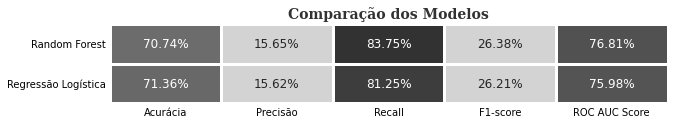

In [42]:
df_models = round(pd.concat([rf_df,lr_df], axis=1),4)
import matplotlib
colors = ["lightgray","lightgray","#000000"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#ffffff"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.set_title('Comparação dos Modelos',loc='center', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.tick_params(axis=u'both', which=u'both',length=0)


plt.show()

#### Alterando o threshold da regressão logística

In [43]:
from sklearn.preprocessing import binarize

y_pred1 = logreg_pipeline.predict_proba(X_test)[:,1]
y_pred1 = y_pred1.reshape(-1,1)
y_pred2 = binarize(y_pred1, threshold = 0.336)#0.252  = 100%, 0.336 = 95% 0.427 = 90%
y_pred2 = np.where(y_pred2 == 1, 1, 0)

lr_df = pd.DataFrame(data=[accuracy_score(y_test, y_pred2),
                           precision_score(y_test, y_pred2),recall_score(y_test, y_pred2),
                           f1_score(y_test,y_pred2),roc_auc_score(y_test, y_pred2)], 
             columns=['Regressão Logística Threshold Modificado'],
             index=["Acurácia", "Precisão", "Recall","F1-score", "ROC AUC Score"])

#### Plot comparando as métricas dos modelos com o threshold modificado

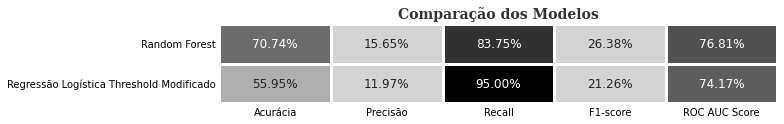

In [44]:
df_models = round(pd.concat([rf_df,lr_df], axis=1),4)
import matplotlib
colors = ["lightgray","lightgray","#000000"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

background_color = "#ffffff"

fig = plt.figure(figsize=(10,8)) # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0, :])

sns.heatmap(df_models.T, cmap=colormap,annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 

ax0.set_title('Comparação dos Modelos',loc='center', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.tick_params(axis=u'both', which=u'both',length=0)


plt.show()